# Main Document

## EDA

## Visuals 

### VISUAL #<X> - Camera Violations Trend - Javid Uddin
**Hypothesis**
The surge in speed camera violations from 2020 to 2021 resulted in a decrease in pedestrian-related and overall traffic crashes.

**Motivation for hypothesis**
It's fascinating to see trends in data, and how they result in direct (or indirect) relationships. In this case, it's interesting to see what caused the drastic increase in speed camera violations, especially on certain roads. Covid-19? More drivers on the roads? Additional lanes added to roads? Sneaky camera placements? We also see a drop-off in the timeline (2021-2024), thus we would like to know how that has affected traffic incidents, especially ones related to pedestrians.

/var/folders/y4/b2fcjhj15hldf0d05r2dg2jr0000gn/T/ipykernel_17534/675337917.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes['POSTED_SPEED_LIMIT'] = pd.to_numeric(crashes['POSTED_SPEED_LIMIT'], errors='coerce')
/var/folders/y4/b2fcjhj15hldf0d05r2dg2jr0000gn/T/ipykernel_17534/675337917.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cameras['VIOLATIONS'] = pd.to_numeric(cameras['VIOLATIONS'], errors='coerce')
/var/folders/y4/b2fcjhj15hldf0d05r2dg2jr0000gn/T/ipykernel_17534/675337917.py:55: Fu

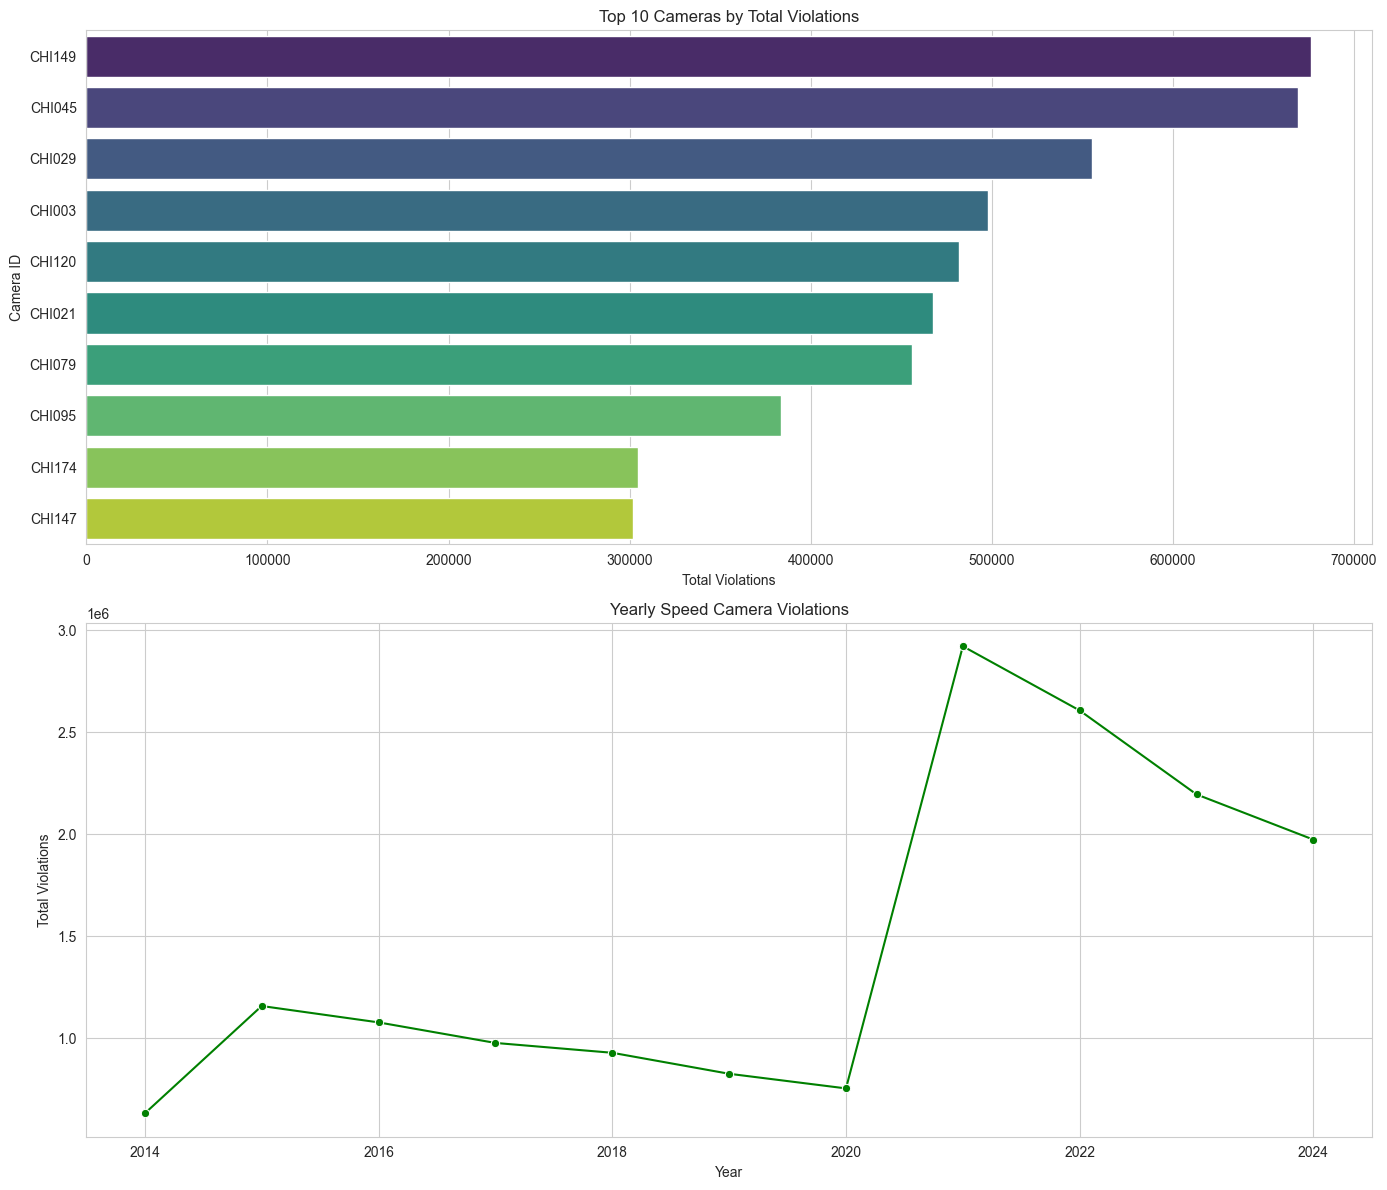

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up visualization
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

def load_data():
    # Load crashes data with proper datetime parsing
    crashes = pd.read_csv("traffic_crashes.csv")
    crashes.columns = crashes.columns.str.strip()
    crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    
    # Load speed camera data
    cameras = pd.read_csv("speed_camera_violations.csv", parse_dates=['VIOLATION DATE'])
    cameras.columns = cameras.columns.str.strip()
    
    # Load traffic data
    traffic = pd.read_csv("chicago_traffic_tracker.csv", parse_dates=[' LAST_UPDATED'])
    traffic.columns = traffic.columns.str.strip()
    
    return crashes, cameras, traffic

def clean_data(crashes, cameras, traffic):
    # Clean crashes data
    crashes = crashes.dropna(subset=['LATITUDE', 'LONGITUDE'])
    crashes['POSTED_SPEED_LIMIT'] = pd.to_numeric(crashes['POSTED_SPEED_LIMIT'], errors='coerce')
    
    # Clean camera data
    cameras = cameras.dropna(subset=['LATITUDE', 'LONGITUDE'])
    cameras['VIOLATIONS'] = pd.to_numeric(cameras['VIOLATIONS'], errors='coerce')
    
    # Clean traffic data
    traffic = traffic[traffic['CURRENT_SPEED'] > 0]  # Remove invalid speed records
    
    return crashes, cameras, traffic

crashes, cameras, traffic = load_data()
crashes, cameras, traffic = clean_data(crashes, cameras, traffic)

def plot_camera_violations(cameras):
    """Analyze speed camera violation patterns"""
    if len(cameras) == 0:
        print("No camera data available")
        return
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Violations by speed camera
    top_cameras = cameras.groupby('CAMERA ID')['VIOLATIONS'].sum().nlargest(10)
    sns.barplot(x=top_cameras.values, y=top_cameras.index, ax=axes[0], palette='viridis')
    axes[0].set_title('Top 10 Cameras by Total Violations')
    axes[0].set_xlabel('Total Violations')
    axes[0].set_ylabel('Camera ID')
    
    # Violation trends over time
    if 'VIOLATION DATE' in cameras.columns:
        cameras['YEAR'] = cameras['VIOLATION DATE'].dt.year
        yearly_violations = cameras.groupby('YEAR')['VIOLATIONS'].sum()
        sns.lineplot(x=yearly_violations.index, y=yearly_violations.values, 
                     ax=axes[1], marker='o', color='green')
        axes[1].set_title('Yearly Speed Camera Violations')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Total Violations')
    
    plt.tight_layout()
    plt.show()

plot_camera_violations(cameras)

## ML 

## Reflection